In [2]:
# Import libraries
import matplotlib.style
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#matplotlib.style.available
matplotlib.style.use('seaborn-v0_8-bright')

In [3]:
# Define path name
folder_path = "XRAY_files/XRAY_Dark/"

# Create file name
def filename_dark(folder, type, idx):
    """ Create file name for dosing

    Args:
        folder (str): The folder path
        type (str): Either mean or variance
        idx: The index of the dark data

    Returns:
        filepath : string containing the system path
    """
    return folder+f"Frame_{type}_No_RAD_{idx}.csv"

In [4]:
# Test the function
test_idx = 1
test_path = filename_dark(folder_path, "mean", test_idx)
print(test_path)

XRAY_files/XRAY_Dark/Frame_mean_No_RAD_1.csv


In [5]:
# Try retrieving data
test_array = np.loadtxt(test_path, delimiter=',')
#print(test_array)

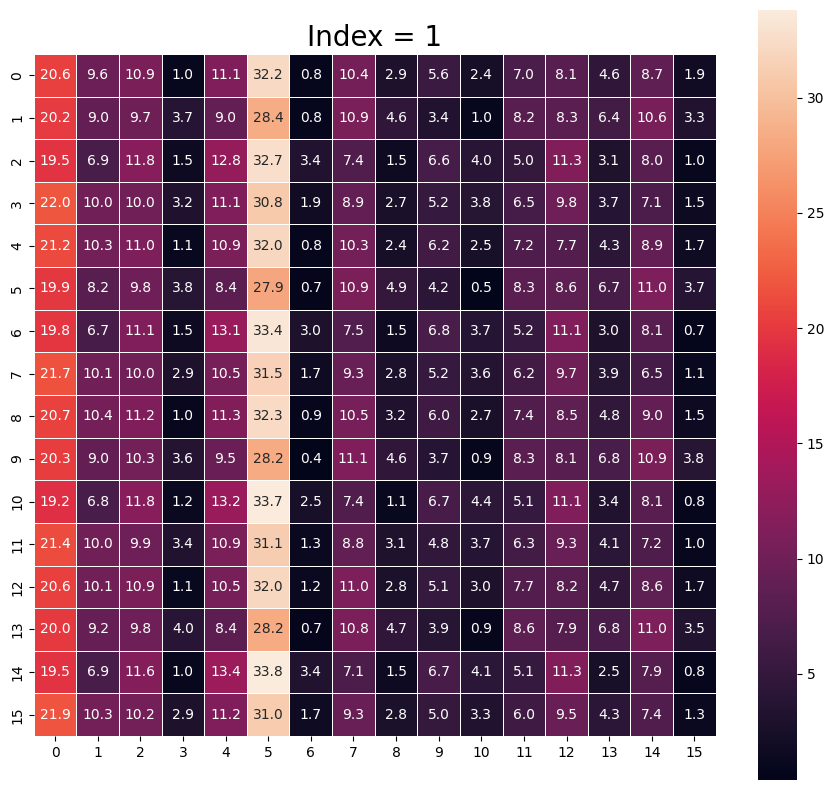

In [6]:
# Test matplotlib plotting, this is for the pixel values
Fig, ax = plt.subplots(1,1, figsize = (11,10))
ax = sns.heatmap(test_array, annot=True, linewidths=.5, fmt = ".1f")
ax.set_title(f"Index = {test_idx}", fontsize = 20)
ax.set_aspect('equal')
plt.show()

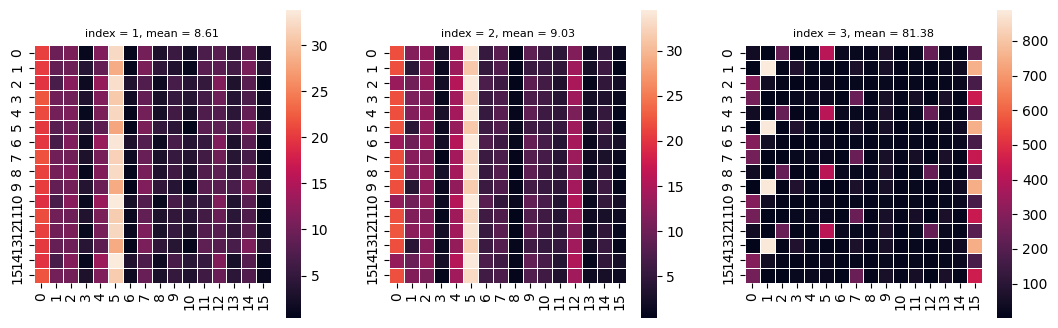

In [7]:
idx_array = [1,2,3]

Fig_idx, ax_idx = plt.subplots(nrows=1, ncols=len(idx_array), figsize = (13,4))
mean_array = np.zeros(3)
var_array = np.zeros(3)

for i, idx in enumerate(idx_array):
    impath = filename_dark(folder_path, "mean", idx)
    varpath = filename_dark(folder_path, "var", idx)
    immean = np.loadtxt(impath, delimiter=',')
    imvar = np.loadtxt(varpath, delimiter=',')
    total_mean = np.sum(immean)/256
    total_var = np.sum(imvar)/256
    mean_array[i] = total_mean
    var_array[i] = total_var
    sns.heatmap(immean, linewidths=.5, ax = ax_idx[i])
    ax_idx[i].set_title(f"index = {idx}, mean = {total_mean:.2f}", fontsize = 8)
    ax_idx[i].set_aspect('equal')

In [8]:
print(var_array)

[ 0.61011719  0.50851563 34.8546875 ]


Text(0, 0.5, 'Mean value')

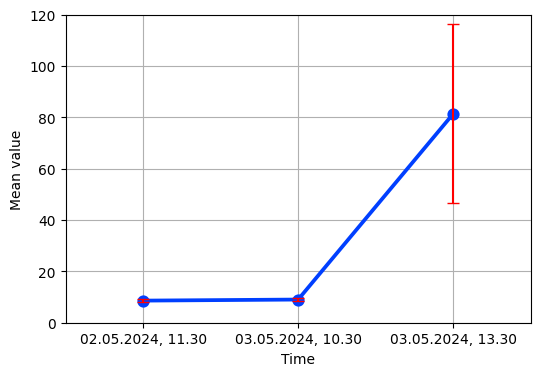

In [13]:
date_array = ['02.05.2024, 11.30', '03.05.2024, 10.30', '03.05.2024, 13.30']
duration_array = ['$0h$', '\\approx']

Fig_dark, ax_dark = plt.subplots(1,1, figsize = (6,4))
sns.pointplot(x=date_array, y= mean_array, ax=ax_dark)
ax_dark.errorbar(x = date_array, y = mean_array, yerr= var_array, linestyle = '', capsize=4, color = 'red')
ax_dark.grid(True)
ax_dark.set_ylim(0,120)
ax_dark.set_xlim([-0.5,2.5])
ax_dark.set_xlabel('Time')
ax_dark.set_ylabel('Mean value')
